# AllLife Credit Card Customer Segmentation

Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

In [2]:
#import key libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.api as sm

In [3]:
df = pd.read_excel('Credit Card Customer Data.xlsx')

# Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank,
online and through a call centre. 

In [4]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [5]:
#Based on the review of first 10 columns, 
#1) The SI_No column is of use and will be dropped. 
#2) Similarly the customer key data is also of  use apparantly as it appears to be a data reference column and should be removed
#3) The data will require scaling to bring to the same/similar units for all columns

# Step 1 & 2. 
Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data.

Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs.


In [6]:
df.shape

(660, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [10]:
#drop unnacessary columns

In [12]:
df.drop(columns = {'Sl_No', 'Customer Key'}, inplace=True)

In [22]:
#Number of unique in each column?
df.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [13]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


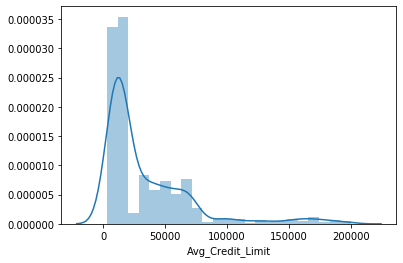

In [23]:
sns.distplot(df['Avg_Credit_Limit'])

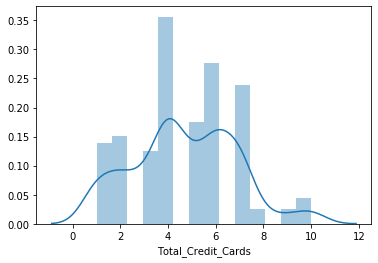

In [24]:
sns.distplot(df['Total_Credit_Cards'])

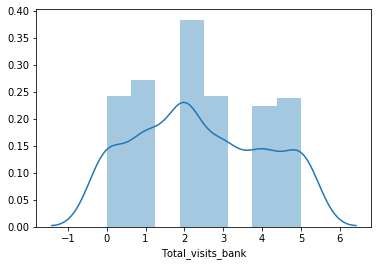

In [26]:
sns.distplot(df['Total_visits_bank'])

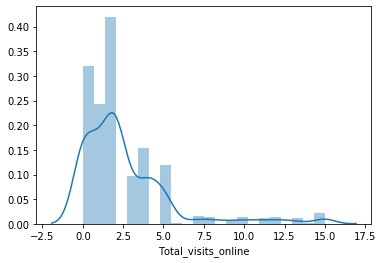

In [27]:
sns.distplot(df['Total_visits_online'])

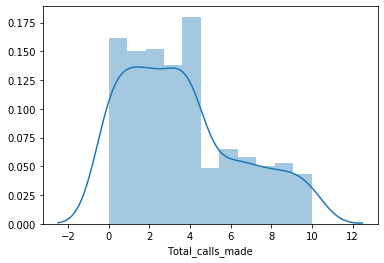

In [28]:
sns.distplot(df['Total_calls_made'])

In [ ]:
#Two variables have a high level of skewness, credit limit and Total visits online.

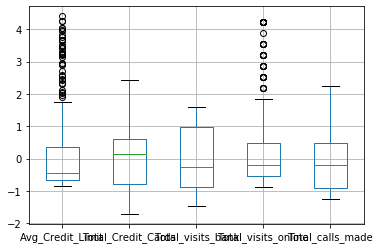

In [45]:
df_z.boxplot()

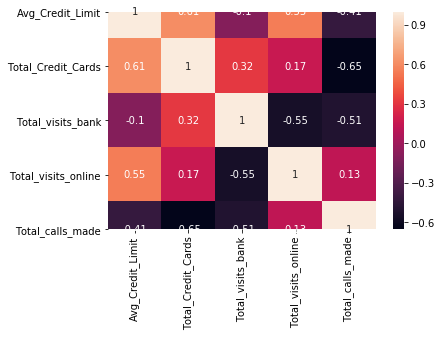

In [14]:
corr = df.corr()
sns.heatmap(corr, annot = True)

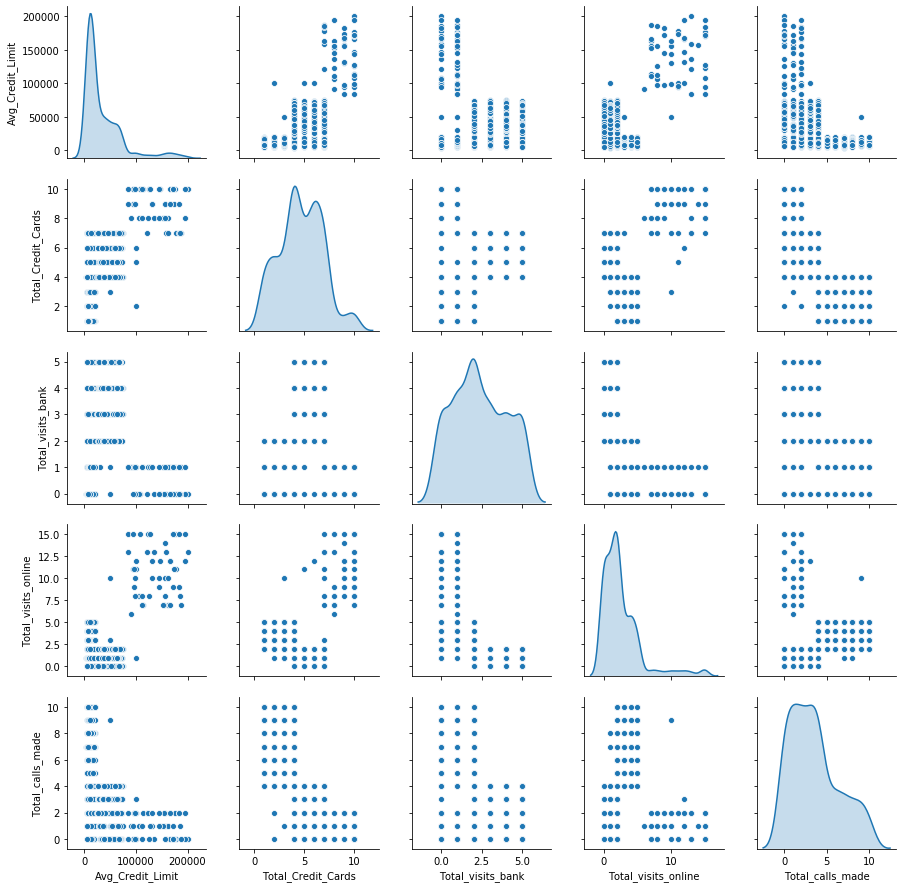

In [16]:
sns.pairplot(df, diag_kind='kde') 

In [18]:

# There is positive correlation between the average credit limit and the number of credit cards as well as the online visists
# There is negative correlation between the average credit limits and the number of bank visits, as well as the number of calls.

In [19]:
##Scale the data
from scipy.stats import zscore


In [20]:
df_z = df.apply(zscore)

In [21]:
df_z.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


# Step 3. 

Execute K-means clustering use elbow plot and analyse clusters using boxplot.

In [ ]:
#import key libraries for KMeans clustering

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

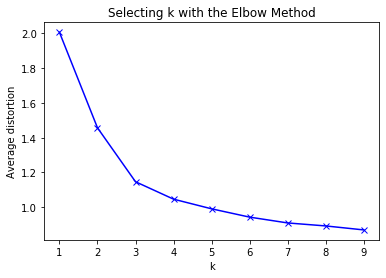

In [35]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [65]:
#Set the value of k=3, as we can see a bend there
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [66]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [67]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 224 386]


In [68]:
# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,2.831764,-0.595796,-0.021062
Total_Credit_Cards,1.862226,-1.059623,0.373690
Total_visits_bank,-1.105763,-0.901518,0.666395
Total_visits_online,2.827319,0.322997,-0.553672
Total_calls_made,-0.874330,1.148109,-0.553005
group,2.000000,0.004464,1.984456


In [69]:
predictions = kmeans.predict(df_z)
predictions
df["group"] = predictions
df['group'] = df['group'].astype('category')
df.dtypes

Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3E4858B48>,
      dtype=object)

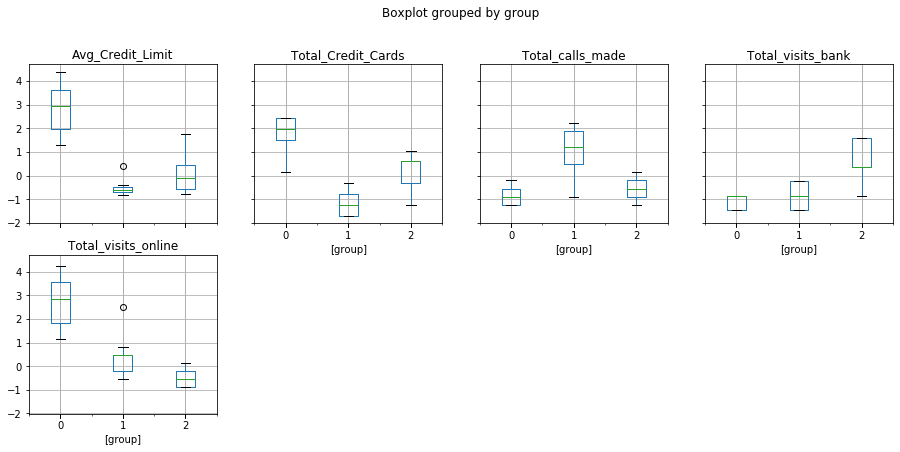

In [70]:
# Visualize the centers

df_z["group"] = predictions
df_z.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [71]:
#Group 3 has the highest credit limited and largest number of credit cards and Group 1 has the lowest.
#Group 2  does the lowest online visits and the group 3 does the highest
#Group 1's main contact is via calls, Group 2's via Bank visit and Group 3's via online.

# I tried 4 clusters but that created two clusters with very similar characteristics, adding no real value, hence reverted to three.

# Step 4. 
Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot.


In [51]:
#### generate the linkage matrix using ward as linkage metric and distance as Eucledian
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_z, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [52]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.74323127,  386.        ],
       [1312.        , 1316.        ,   48.00441902,  436.        ],
       [1315.        , 1317.        ,   53.71911022,  660.        ]])

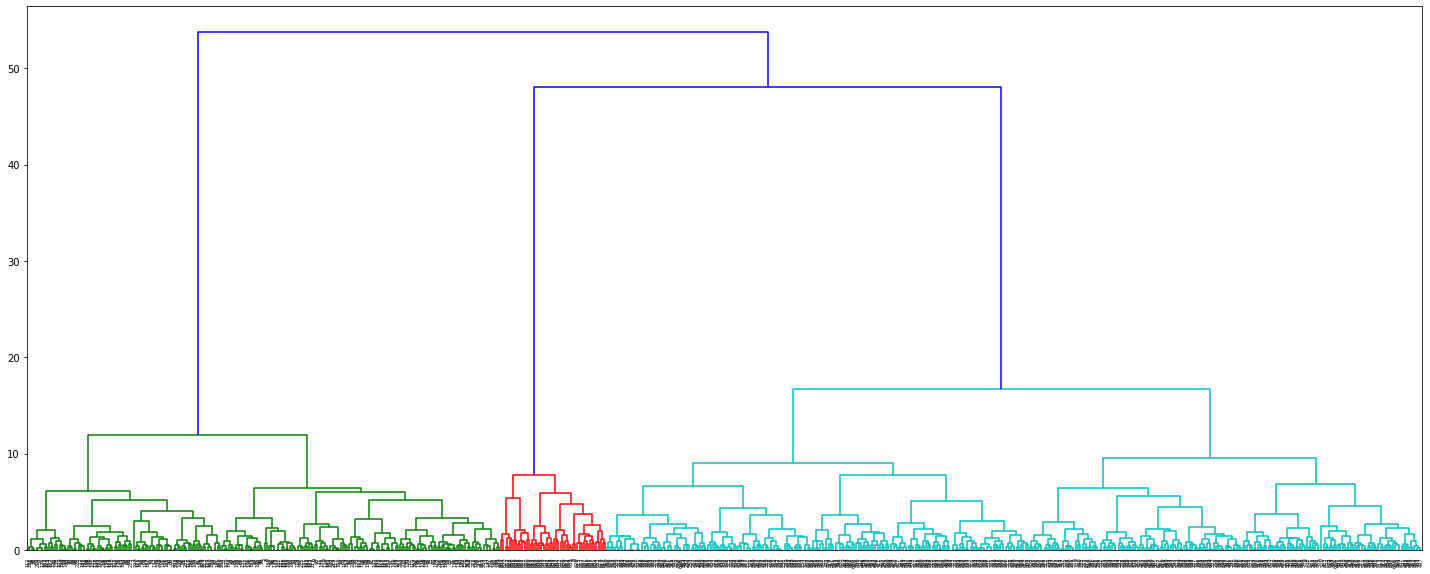

In [53]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [55]:
# From the truncated dendrogram, find out the optimal distance between clusters

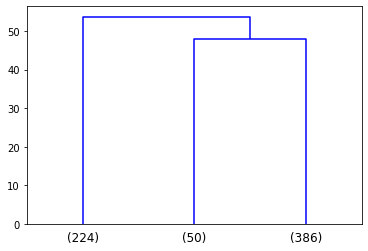

In [58]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [73]:
#Three clusters in heirarchical clustering deliver very similar results to the KMean clustering. 
#The same is true for p=4 as well.

In [81]:
#### generate the linkage matrix using complete as linkage metric and distance as Eucledian
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_z, 'complete', metric='euclidean')
Z.shape

(659, 4)

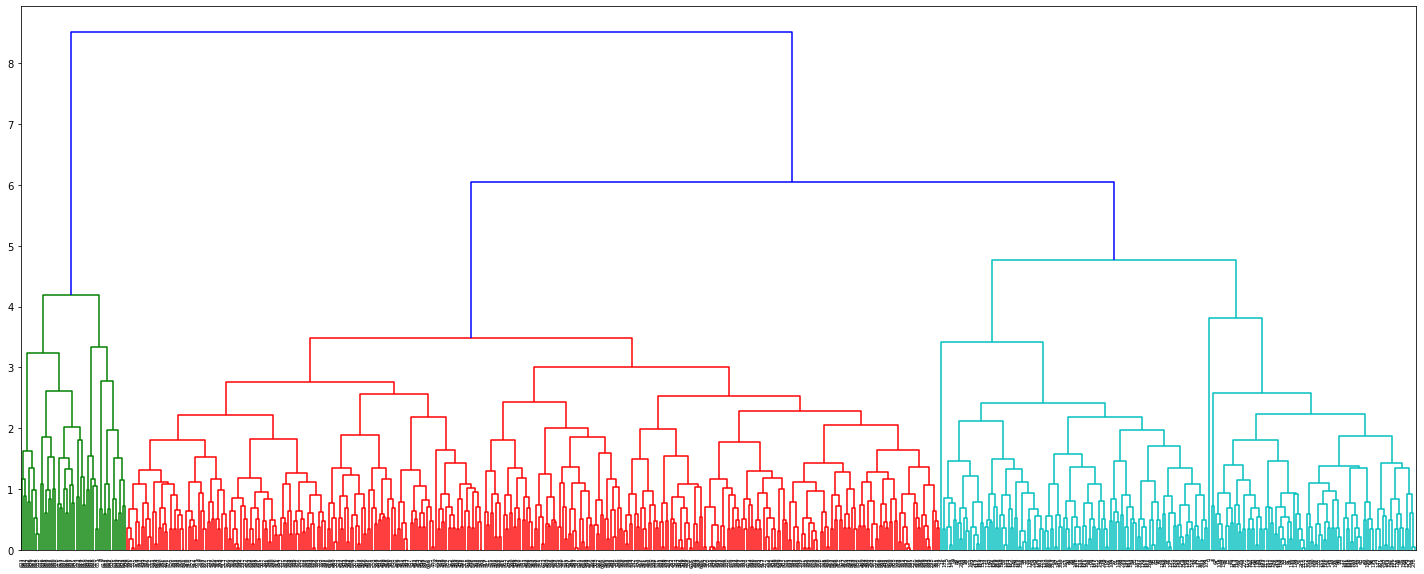

In [75]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

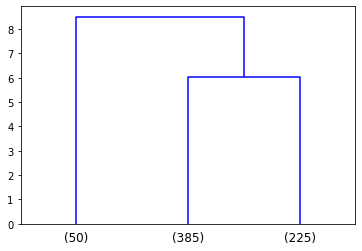

In [76]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [84]:
#There is little difference in the results using the complete linkage 

In [97]:
#Setting Max_d to 5 to break the population into three clusters
max_d = 5

In [95]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3E61C3BC8>,
      dtype=object)

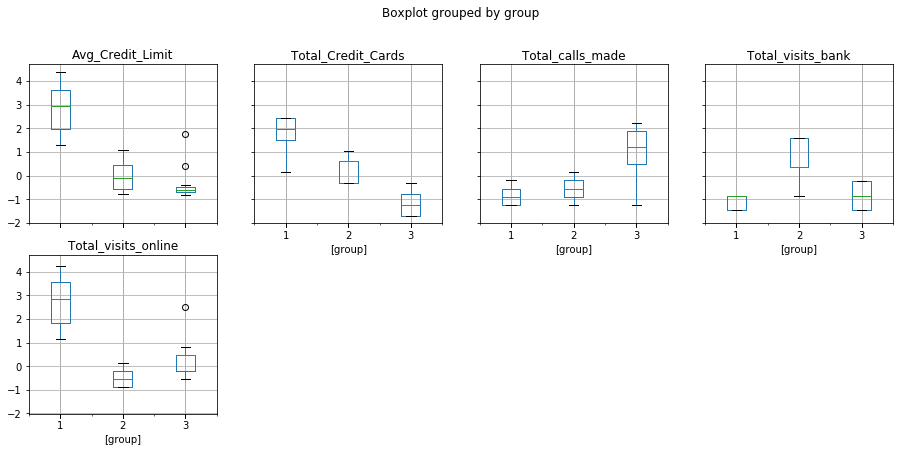

In [107]:
# Visualize the centers

df_z["group"] = clusters
df_z.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [ ]:
# The cluster here are very similar to the clusters above in the KMean Clustering output. Further comparison and analysis below.

# Step 5. 
Calculate average silhouette score for both methods.


In [96]:
# Calculate Avg Silhoutte Score of Heirarchical Clustering

from sklearn.metrics import silhouette_score
silhouette_score(df_z, clusters)

0.540132166709661

In [108]:
# Calculate Avg Silhoutte Score of KMean Clustering

from sklearn.metrics import silhouette_score
silhouette_score(df_z, predictions)

0.5395748255332516

Silhouette Score is better when closer 1 and worse when closer to -1, here, it appears OK in both cases and there is no major difference.
The silhouette score both the methods is pretty close mainly because of similar number of clusters chosen and both methods results were pretty close together. If 'ward' method was applied for heirarchical clustering, the results would be almost the same.


# Step 6. 
Compare K-means clusters with Hierarchical clusters.


When compare the three clusters created, it is evident that there are three similar clusters in both the cases. 
1) High credit card average limit, higher number of average cards and mainly online users.
2) Medium Credit card average limit, some credit cards and these customers usually go to bank often.
3) Low credit card limit, low to no credit cards and these users mainly prefer calling the bank.

Using both the clustering methods, these three groups appeared the optimal apprach to cluster. Increasing the number of clusters returned similar clusters.

# Step 7. 
Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions.

How many different segments of customers are there?

There are mainly three customer segments. 

Cluster 1 - High credit card limit customers

Cluster 2 - Medium limit customers

Cluster 3-  Low limit customers

How are these segments different from each other?

Cluster 1 - The customers with higher credit card limit and more cards, usually prefer to use online banking and do not visit branch as much. However, this is a small group

Cluster 2 - These customers have medium credit card limits and mainly prefer to visit the bank branches. This is the largest group.

Cluster 3 - These customers have low credit limit and prefer to contact the bank via phone calls. This is the second largest group.

What are your recommendations to the bank on how to better market to and service these customers?

The bank should target the marketing in line with the customer preferences. The cluster one is clearly a big spender small group that costs less to the bank to maintain. The bank should target additional products to these customers.

Bank should analyze of there is a correlation between online usage and higher card spend, and target the phone and bank users to use more online services. Hence there should be more online use campaigns within bank branches and on calls.